In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# Import weekly historical data for SPY and GLD from 2010-2022
SPY = pd.read_csv("SPY.csv")["Adj Close"]
GLD = pd.read_csv("GLD.csv")["Adj Close"]

## Task 4:

# Part 1

In [131]:
SPY_log = np.log1p(SPY.pct_change())
GLD_log = np.log1p(GLD.pct_change())

df = pd.DataFrame({"SPY": SPY_log * 52, 
                   "GLD": GLD_log * 52})

print("SPY Average Annual Returns:", round(np.mean(SPY_log) * 52 * 100, 2), "%")
print("SPY Average Annual Volatility:", round(np.std(SPY_log) * np.sqrt(52) * 100, 2), "%")
print("GLD Average Annual Returns:", round(np.mean(GLD_log) * 52 * 100, 2), "%")
print("GLD Average Annual Volatility:", round(np.std(GLD_log) * np.sqrt(52) * 100, 2), "%")

SPY Average Annual Returns: 13.76 %
SPY Average Annual Volatility: 15.76 %
GLD Average Annual Returns: 3.6 %
GLD Average Annual Volatility: 15.91 %


# Part 2

In [132]:
SPY_annual = np.log1p(SPY.pct_change(52))
GLD_annual = np.log1p(GLD.pct_change(52))


print("SPY Average Annual Returns:", round(np.mean(SPY_annual) * 100, 2), "%")
print("SPY Average Annual Volatility:", round(np.std(SPY_annual) * 100, 2), "%")
print("GLD Average Annual Returns:", round(np.mean(GLD_annual) * 100, 2), "%")
print("GLD Average Annual Volatility:", round(np.std(GLD_annual) * 100, 2), "%")

SPY Average Annual Returns: 13.9 %
SPY Average Annual Volatility: 9.45 %
GLD Average Annual Returns: 3.07 %
GLD Average Annual Volatility: 14.79 %


# Part 3

In [133]:
# Compare...

## Task 5:

In [140]:
print("Correlation:", round((df["SPY"]).corr((df["GLD"])) * 100, 2), "%")
covariance_matrix = df.cov()
covariance_matrix

Correlation: 17.38 %


,SPY,GLD
SPY,1.294149,0.227025
GLD,0.227025,1.318754


## Task 6

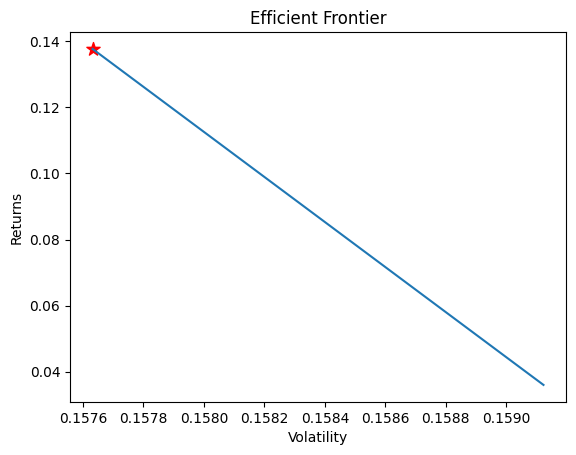

In [141]:
w = list(range(0, 101, 1))
rtrns, vols, sharpe = [], [], []

for item in w:
    rtrns.append((np.mean(SPY_log) * 52 * (item/100)) + (np.mean(GLD_log) * 52 * (1 - (item/100))))
    vols.append((np.std(SPY_log) * np.sqrt(52) * (item/100)) + (np.std(GLD_log) * np.sqrt(52) * (1 - (item/100))))
    sharpe.append(rtrns[-1] / vols[-1])

max_sharpe_i = np.argmax(sharpe)
max_sharpe_rtrn = rtrns[max_sharpe_i]
max_sharpe_sd = vols[max_sharpe_i]

plt.title("Efficient Frontier")
plt.ylabel("Returns")
plt.xlabel("Volatility")
plt.plot(vols, rtrns)
plt.scatter(max_sharpe_sd, max_sharpe_rtrn, color = "red", marker = "*", s = 100)

## Task 7:

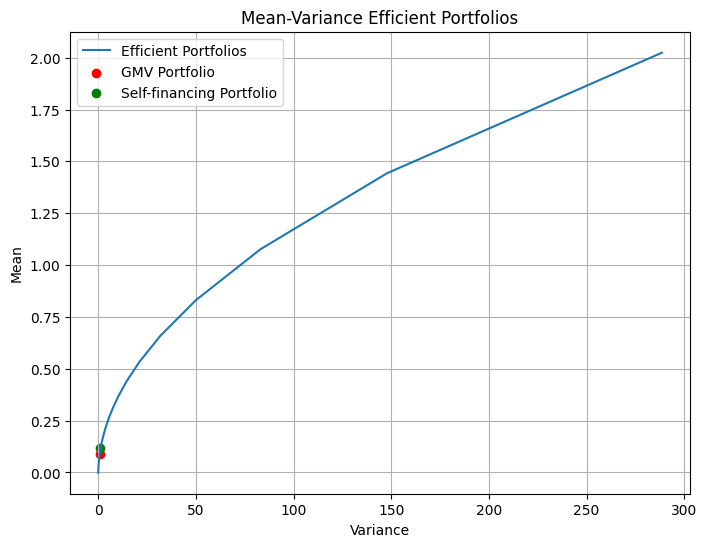

In [144]:
# Example data
returns = np.array([np.mean(SPY_log * 52), np.mean(GLD_log * 52)])  # Example returns of two assets 

# Calculate GMV portfolio
gmv_portfolio_weights = np.linalg.inv(covariance_matrix).sum(axis=1) / np.linalg.inv(covariance_matrix).sum()
gmv_portfolio_return = np.dot(returns, gmv_portfolio_weights)
gmv_portfolio_variance = np.dot(gmv_portfolio_weights, np.dot(covariance_matrix, gmv_portfolio_weights))

# Calculate self-financing portfolio (highest Sharpe ratio portfolio)
risk_free_rate = 0
sharpe_ratios = (returns - risk_free_rate) / np.sqrt(np.diag(covariance_matrix))
self_financing_portfolio_weights = sharpe_ratios / sharpe_ratios.sum()
self_financing_portfolio_return = np.dot(returns, self_financing_portfolio_weights)
self_financing_portfolio_variance = np.dot(self_financing_portfolio_weights, np.dot(covariance_matrix, self_financing_portfolio_weights))

# Create 100 mean-variance efficient portfolios
risk_aversion_levels = np.linspace(0.1, 5, 100)
efficient_portfolios = []
for alpha in risk_aversion_levels:
    w = (alpha * gmv_portfolio_weights + (1 - alpha) * self_financing_portfolio_weights) / ((alpha + (1 - alpha) * sharpe_ratios.sum())**2)
    efficient_portfolio_return = np.dot(returns, w)
    efficient_portfolio_variance = np.dot(w, np.dot(covariance_matrix, w))
    efficient_portfolios.append((efficient_portfolio_return, efficient_portfolio_variance))

# Plot mean vs variance
plt.figure(figsize=(8, 6))
efficient_portfolios = np.array(efficient_portfolios)
plt.plot(efficient_portfolios[:, 1], efficient_portfolios[:, 0], label='Efficient Portfolios')
plt.scatter(gmv_portfolio_variance, gmv_portfolio_return, color='red', marker='o', label='GMV Portfolio')
plt.scatter(self_financing_portfolio_variance, self_financing_portfolio_return, color='green', marker='o', label='Self-financing Portfolio')
plt.xlabel('Variance')
plt.ylabel('Mean')
plt.title('Mean-Variance Efficient Portfolios')
plt.legend()
plt.grid(True)
plt.show()
